In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import h5py as h5

import os

% matplotlib inline

In [2]:
input_dir = r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\results'

input_paths = [os.path.join(input_dir, f) for f in os.listdir(input_dir)]

In [3]:
results = [pd.read_csv(f) for f in input_paths]
starttimes = [pd.to_datetime(f.split('\\')[-1].split('.')[0].split('_')[0]) for f in input_paths]
endtimes = [pd.to_datetime(f.split('\\')[-1].split('.')[0].split('_')[1][:-7]) for f in input_paths]

ValueError: Unknown string format

In [5]:
results[0].head()

,Unnamed: 0,Channel Number,Optical Distance,Measured Depth (mKB),UTM - N,UTM - E,True Vertical Depth (mKB),Stage,Cluster,TD,...,Shots,MD,Pstring,Clusters_per_stage,b1,b2,b3,b4,ChiMean,ChiMeanNorm
0,0,0,0.5,3.4,0.0,0.0,3.4,NaN,NaN,NaN,...,NaN,NaN,Pnan-nan,0.0,2256.551696,250.123744,NaN,249.355064,1253.337720,0.019148
1,1,1,1.5,4.4,0.0,0.0,4.4,NaN,NaN,NaN,...,NaN,NaN,Pnan-nan,0.0,1200.887219,1948.485515,NaN,415.852035,1574.686367,0.024057
2,2,2,2.5,5.4,0.0,0.0,5.4,NaN,NaN,NaN,...,NaN,NaN,Pnan-nan,0.0,978.793307,NaN,NaN,1446.203287,978.793307,0.014954
3,3,3,3.5,6.4,0.0,0.0,6.4,NaN,NaN,NaN,...,NaN,NaN,Pnan-nan,0.0,12483.209525,NaN,16261.585249,2074.860502,14372.397387,0.219574
4,4,4,4.5,7.4,0.0,0.0,7.4,NaN,NaN,NaN,...,NaN,NaN,Pnan-nan,0.0,65455.727998,NaN,7594.146568,2110.288278,36524.937283,0.558010


In [6]:
starttimes[0]

NameError: name 'starttimes' is not defined

IndexError: index 5 is out of bounds for axis 0 with size 5

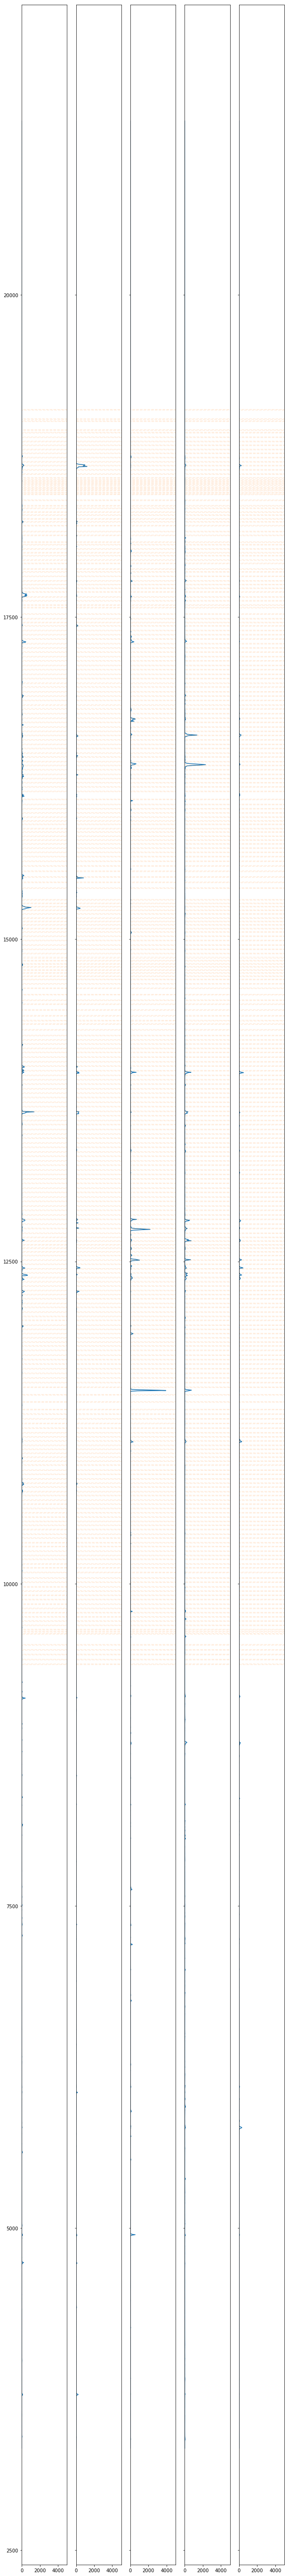

In [7]:
fig, ax = plt.subplots(1, 5, figsize = (10, 100), sharey = True)

for i, result in enumerate(results):
    ax[i].plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084)
    ax[i].plot(result.ix[1000:, 'Shots'].fillna(0) * 5000, result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084, linestyle = '--', linewidth = 1, alpha = 0.2)
    ax[i].set_xlim([0, 5000])

fig.gca().invert_yaxis()
plt.show()

In [8]:
overview = pd.DataFrame(index = results[0].index)

for i in range(5):
    overview['Int{0}'.format(i)] = results[i]['ChiMean']

In [9]:
dts_depth = pd.read_csv(r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\data\flow_02__DTS_Fibre.csv', skiprows=1)

In [10]:
dts_depth.head()

,#ChannelNumber,OpticalDistance(m),PhysicalDistance(mKB),easting,northing,TVD_KB
0,0,0.24993599951267242,-53.97602619181271,0.0,0.0,-53.976026
1,1,0.7498079985380173,-53.47615419278736,0.0,0.0,-53.476154
2,2,1.2496799975633621,-52.97628219376202,0.0,0.0,-52.976282
3,3,1.749551996588707,-52.47641019473667,0.0,0.0,-52.476410
4,4,2.249423995614052,-51.97653819571133,0.0,0.0,-51.976538


In [11]:
dts_dir = r'C:\Users\george.crowther\Dropbox (OptaSense OFS)\Customer Projects\Rice Energy\Belmont Project\Flow_Project\Output\DTS_to_HDF5_Converter_2017-02-23_15_02_33_00'

dts_paths = [os.path.join(dts_dir, f) for f in os.listdir(dts_dir) if f.endswith('.h5')]

In [12]:
dts_files = [h5.File(f, 'r') for f in dts_paths if os.path.getsize(f) > 350000]

In [13]:
dts_valid = [f for f in dts_files if f['/DTS/Temperature'].shape[0] == 11528]

In [14]:
dts_unsorted = [(f['/DTS/Times'][0], f) for f in dts_valid]
dts_unsorted.sort()
dts_sorted = [f[1] for f in dts_unsorted]

In [15]:
dts_data = [f['/DTS/Temperature'] for f in dts_sorted]
dts_array = np.concatenate(dts_data, axis = 1)

In [16]:
dts_time = [f['/DTS/Times'] for f in dts_sorted]
dts_array_time = np.concatenate(dts_time)

In [17]:
dts_out = h5.File(r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\data\dts_output.h5', 'w')
dts_out['/DTS/Temperature'] = dts_array
dts_out['/DTS/Times'] = dts_array_time

In [ ]:
[f.close() for f in dts_files]
dts_out.close()

In [ ]:
dts_f = h5.File(r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\data\dts_output.h5')
dts_array = dts_f['/DTS/Temperature']
dts_array_time = dts_f['/DTS/Times']

In [ ]:
dts_frame = pd.DataFrame(data = dts_array.value.T, index = pd.to_datetime(dts_array_time.value * 1000000))

In [ ]:
dts_frame.head()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.imshow(dts_frame.iloc[:3000, 6000:].resample('6H').mean().interpolate(how='time').T, aspect = 'auto', vmin = 150, vmax = 180)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.imshow(dts_frame.iloc[:, 6000:].resample('6H').mean().T.diff(axis = 0), aspect = 'auto', vmin = -0.1, vmax = 0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.imshow(dts_frame.iloc[:, 6000:].resample('6H').mean().T.subtract(dts_frame.iloc[:100, 6000:].mean()
                                                                    , 
                                                                    axis = 0), aspect = 'auto', vmin = -0.1, vmax = 0.1)
plt.show()

In [ ]:
dts_depth[' PhysicalDistance(mKB)'] = pd.to_numeric(dts_depth[' PhysicalDistance(mKB)'], errors = 'coerce')

In [ ]:
dts_frame.columns = dts_depth[' PhysicalDistance(mKB)'][:len(dts_frame.columns)]

In [ ]:
dts_frame.head()

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (20, 100), sharey = True)

for i, result in enumerate(results):
    
    ax[i].plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084)
    ax[i].set_xlim([0, 2500])
    ax2 = ax[i].twiny()
    ax2.plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084, linestyle = '--')
    ax2.set_xlim([2500, 5000])
    ax2.xaxis.set_visible(False)
    
    # Temperature Plots
    ax3 = ax[i].twiny()
    ax3.plot(dts_frame[starttimes[i]:endtimes[i]].mean(), dts_frame.columns * 3.28084, color = 'red', linewidth = 1)
    ax3.set_xlim([150, 160])
    ax4 = ax[i].twiny()
    ax4.plot(dts_frame[starttimes[i]:endtimes[i]].mean(), dts_frame.columns * 3.28084, color = 'red', linewidth = 2)
    ax4.set_xlim([160, 170])
    ax4.xaxis.set_visible(False)
    ax5 = ax[i].twiny()
    ax5.plot(dts_frame[starttimes[i]:endtimes[i]].mean(), dts_frame.columns * 3.28084, color = 'red', linewidth = 2, linestyle = '--')
    ax5.set_xlim([170, 180])
    ax5.xaxis.set_visible(False)
    ax6 = ax[i].twiny()
    for n, group in result.groupby('Stage'):
        ax6.scatter(group['Shots'], result.ix[group.index, 'Measured Depth (mKB)'] * 3.28084)
    ax6.set_xlim([0, 12])
    ax6.xaxis.set_ticks_position('bottom')
    ax6.xaxis.set_label_position('bottom')
    ax6.spines["bottom"].set_position(("axes", -0.006))
    
    
    # Gridlines and ticks
    ax[i].set_ylim([5000, 19000])
    ax[i].set_xticks(np.arange(0, 2500, 1250))
    ax[i].set_yticks(np.arange(5000, 19000, 500))
    ax[i].set_xticklabels(np.arange(0, 2500, 1250))
    ax[i].set_yticklabels(np.arange(5000, 19000, 500))
    ax[i].set_xticks(np.arange(0, 2500, 250), minor = True)
    ax[i].set_yticks(np.arange(5000, 19000, 100), minor = True)
    
    ax[i].grid(which = 'major', color = 'black')
    ax[i].grid(which = 'minor', linestyle = '--')
    
    # Axis Labels
    ax[i].set_ylabel('Measured Depth (ftKB)')
    ax[i].set_xlabel('Chi-Squared Mean')
    ax3.set_xlabel('Temperature (deg C)')
    ax6.set_xlabel('Shots per Cluster')
    
    # Chart Title
    ax[i].set_title('Response {0}\n - {1}'.format(starttimes[i], endtimes[i]), y = 1.006)
    
fig.gca().invert_yaxis()
ax7 = ax[-1].twinx()
ax7.xaxis.set_visible(False)
ax7.set_yticks(results[0].dropna(axis = 0)['Measured Depth (mKB)'] * 3.28084)
ax7.set_yticklabels(results[0].dropna(axis = 0)['Pstring'])

ax7.yaxis.set_ticks_position('right')
ax7.yaxis.set_label_position('right')
ax7.set_ylim([5000, 19000])

fig.gca().invert_yaxis()
plt.show()

In [ ]:
baseline = dts_frame.iloc[:10, :].mean()

fig, ax = plt.subplots(1, 5, figsize = (20, 100), sharey = True)

for i, result in enumerate(results):
    
    ax[i].plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084)
    ax[i].set_xlim([0, 2500])
    ax2 = ax[i].twiny()
    ax2.plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084, linestyle = '--')
    ax2.set_xlim([2500, 5000])
    ax2.xaxis.set_visible(False)
    
    # Temperature Plots
    dts_diff = dts_frame[endtimes[i]:endtimes[i] + pd.Timedelta('12H')].mean() - baseline
    
    ax3 = ax[i].twiny()
    ax3.plot(dts_diff, dts_frame.columns * 3.28084, color = 'red', linewidth = 1)
    ax3.set_xlim([0, 20])
    ax4 = ax[i].twiny()
    ax4.plot(dts_diff, dts_frame.columns * 3.28084, color = 'red', linewidth = 2)
    ax4.set_xlim([-20, 0])
    ax4.xaxis.set_visible(False)
    ax5 = ax[i].twiny()
    #ax5.plot(dts_diff, dts_frame.columns * 3.28084, color = 'red', linewidth = 2, linestyle = '--')
    #ax5.set_xlim([170, 180])
    ax5.xaxis.set_visible(False)
    ax6 = ax[i].twiny()
    for n, group in result.groupby('Stage'):
        ax6.scatter(group['Shots'], result.ix[group.index, 'Measured Depth (mKB)'] * 3.28084)
    ax6.set_xlim([0, 12])
    ax6.xaxis.set_ticks_position('bottom')
    ax6.xaxis.set_label_position('bottom')
    ax6.spines["bottom"].set_position(("axes", -0.006))
    
    
    # Gridlines and ticks
    ax[i].set_ylim([5000, 19000])
    ax[i].set_xticks(np.arange(0, 2500, 1250))
    ax[i].set_yticks(np.arange(5000, 19000, 500))
    ax[i].set_xticklabels(np.arange(0, 2500, 1250))
    ax[i].set_yticklabels(np.arange(5000, 19000, 500))
    ax[i].set_xticks(np.arange(0, 2500, 250), minor = True)
    ax[i].set_yticks(np.arange(5000, 19000, 100), minor = True)
    
    ax[i].grid(which = 'major', color = 'black')
    ax[i].grid(which = 'minor', linestyle = '--')
    
    # Axis Labels
    ax[i].set_ylabel('Measured Depth (ftKB)')
    ax[i].set_xlabel('Chi-Squared Mean')
    ax3.set_xlabel('Temperature from baseline (deg C)')
    ax6.set_xlabel('Shots per Cluster')
    
    # Chart Title
    ax[i].set_title('Response {0}\n - {1}'.format(starttimes[i], endtimes[i]), y = 1.006)
    
fig.gca().invert_yaxis()
ax7 = ax[-1].twinx()
ax7.xaxis.set_visible(False)
ax7.set_yticks(results[0].dropna(axis = 0)['Measured Depth (mKB)'] * 3.28084)
ax7.set_yticklabels(results[0].dropna(axis = 0)['Pstring'])

ax7.yaxis.set_ticks_position('right')
ax7.yaxis.set_label_position('right')
ax7.set_ylim([5000, 19000])

fig.gca().invert_yaxis()
plt.show()

In [ ]:
baseline = dts_frame.iloc[:10, :].mean()

fig, ax = plt.subplots(1, 5, figsize = (20, 20), sharey = True)

for i, result in enumerate(results):
    
    ax[i].plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084)
    ax[i].set_xlim([0, 2500])
    ax2 = ax[i].twiny()
    ax2.plot(result.ix[1000:, 'b4'], result.ix[1000:, 'Measured Depth (mKB)'] * 3.28084, linestyle = '--')
    ax2.set_xlim([2500, 5000])
    ax2.xaxis.set_visible(False)
    
    # Temperature Plots
    dts_diff = dts_frame[endtimes[i]:endtimes[i] + pd.Timedelta('12H')].mean() - baseline
    
    ax3 = ax[i].twiny()
    ax3.plot(dts_diff, dts_frame.columns * 3.28084, color = 'red', linewidth = 1)
    ax3.set_xlim([0, 20])
    ax4 = ax[i].twiny()
    ax4.plot(dts_diff, dts_frame.columns * 3.28084, color = 'red', linewidth = 2)
    ax4.set_xlim([-20, 0])
    ax4.xaxis.set_visible(False)
    ax5 = ax[i].twiny()
    #ax5.plot(dts_diff, dts_frame.columns * 3.28084, color = 'red', linewidth = 2, linestyle = '--')
    #ax5.set_xlim([170, 180])
    ax5.xaxis.set_visible(False)
    ax6 = ax[i].twiny()
    for n, group in result.groupby('Stage'):
        ax6.scatter(group['Shots'], result.ix[group.index, 'Measured Depth (mKB)'] * 3.28084)
    ax6.set_xlim([0, 12])
    ax6.xaxis.set_ticks_position('bottom')
    ax6.xaxis.set_label_position('bottom')
    ax6.spines["bottom"].set_position(("axes", -0.05))
    
    
    # Gridlines and ticks
    ax[i].set_ylim([5000, 19000])
    ax[i].set_xticks(np.arange(0, 2500, 1250))
    ax[i].set_yticks(np.arange(5000, 19000, 500))
    ax[i].set_xticklabels(np.arange(0, 2500, 1250))
    ax[i].set_yticklabels(np.arange(5000, 19000, 500))
    ax[i].set_xticks(np.arange(0, 2500, 250), minor = True)
    ax[i].set_yticks(np.arange(5000, 19000, 100), minor = True)
    
    ax[i].grid(which = 'major', color = 'black')
    ax[i].grid(which = 'minor', linestyle = '--')
    
    # Axis Labels
    ax[i].set_ylabel('Measured Depth (ftKB)')
    ax[i].set_xlabel('Chi-Squared Mean')
    ax3.set_xlabel('Temperature from baseline (deg C)')
    ax6.set_xlabel('Shots per Cluster')
    
    # Chart Title
    ax[i].set_title('Response {0}\n - {1}'.format(starttimes[i], endtimes[i]), y = 1.05)
    
fig.gca().invert_yaxis()
ax7 = ax[-1].twinx()
ax7.xaxis.set_visible(False)
ax7.set_yticks(results[0].dropna(axis = 0)['Measured Depth (mKB)'] * 3.28084)
ax7.set_yticklabels(results[0].dropna(axis = 0)['Pstring'])

ax7.yaxis.set_ticks_position('right')
ax7.yaxis.set_label_position('right')
ax7.set_ylim([5000, 19000])

fig.gca().invert_yaxis()
plt.show()

In [ ]:
cement_dir = r'C:\Users\george.crowther\Dropbox (OptaSense OFS)\Rice - OptaSense Project\Cement Data'
cement_files = [os.path.join(cement_dir, f) for f in os.listdir(cement_dir)]

In [ ]:
cement_files[:10]

In [ ]:
geothermal = pd.read_csv(cement_files[0], skiprows=11)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 100))
for i, f in enumerate(cement_files[:10]):
    fdata = pd.read_csv(f, skiprows=11)
    ax.plot(fdata['Temp(F)'], fdata['Distance (ft)'], color = str(1 / (i + 1)))
    
fig.gca().invert_yaxis()
plt.show()

In [ ]:
for i, f in enumerate(cement_files[:400]):
    if i == 0:
        fdata = pd.read_csv(f, skiprows=11)
        #fdata.index = fdata['Distance (ft)']
    else:
        temp = pd.read_csv(f, skiprows=11)
        fdata = pd.concat((fdata, temp['Temp(F)']), axis = 1)

In [ ]:
fig, ax = plt.subplots()
ax.plot(fdata.iloc[:, 1:].mean(axis = 1))
plt.show()

In [ ]:
hfp_results = pd.read_csv(r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\data\Fluid-Proppant Totals.csv')

In [ ]:
hfp_results.head()

In [ ]:
results[0].loc[results[0]['Pstring'] != 'Pnan-nan'][::-1]

In [ ]:
for i, result in enumerate(results):
    results[i]['Proppant%'] = 0
    results[i]['Fluid%'] = 0
    results[i]['Proppant(lbm)'] = 0
    results[i]['Fluid(bbl)'] = 0
    
    results[i].loc[results[i]['Pstring'] != 'Pnan-nan', 'Proppant%'] = hfp_results['% Proppant'][::-1].values
    results[i].loc[results[i]['Pstring'] != 'Pnan-nan', 'Fluid%'] = hfp_results['% Fluid'][::-1].values
    results[i].loc[results[i]['Pstring'] != 'Pnan-nan', 'Proppant(lbm)'] = hfp_results['Prop (lbm)'][::-1].values
    results[i].loc[results[i]['Pstring'] != 'Pnan-nan', 'Fluid(bbl)'] = hfp_results['Fluid (bbl)'][::-1].values

In [ ]:
results[3].loc[results[3]['Pstring'] != 'Pnan-nan'].head()

In [ ]:
import bokeh.plotting as bk
from bokeh.models import HoverTool, ResizeTool, BoxZoomTool, WheelZoomTool, PanTool, ResetTool, SaveTool
from bokeh.palettes import Viridis

bk.output_notebook()

TOOLS = [HoverTool(), ResizeTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool()]

r = results[3].loc[results[2]['Pstring'] != 'Pnan-nan']
p = bk.figure(tools = TOOLS)
p.scatter(r['Proppant(lbm)'], r['ChiMean'])

bk.show(p)

In [ ]:
r = []
p = []
stage_labels = []
for stage, group in results[3].groupby('Stage'):
    top_depth = group['Measured Depth (mKB)'].min()
    bottom_depth = group['Measured Depth (mKB)'].max()
    stage_labels.append(str(stage))
    r.append(results[2].loc[results[3]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'ChiMean'].sum())
    p.append(results[2].loc[results[3]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'Proppant(lbm)'].sum())
    
TOOLS = [HoverTool(), ResizeTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool()]
    
fig = bk.figure(tools = TOOLS)
fig.scatter(p, r)

fig.xaxis.axis_label = 'Proppant (lbm)'
fig.yaxis.axis_label = 'Summed ChiMean'
fig.title.text = 'Summed ChiMean response across Stage'

bk.show(fig)

In [ ]:
TOOLS = [HoverTool(), ResizeTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool(), SaveTool()]
fig = bk.figure(tools = TOOLS)

cmap = Viridis[4]

for i in range(4):
    r = []
    p = []
    stage_labels = []
    for stage, group in results[i].groupby('Stage'):
        top_depth = group['Measured Depth (mKB)'].min() - 1
        bottom_depth = group['Measured Depth (mKB)'].max() + 1
        stage_labels.append(str(stage))
        r.append(results[i].loc[results[i]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'ChiMean'].sum() / (bottom_depth - top_depth))
        p.append(results[i].loc[results[i]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'Proppant(lbm)'].sum() / (bottom_depth - top_depth))
    
    fig.scatter(p, r, color = cmap[i])
        
fig.xaxis.axis_label = 'Proppant (lbm) / m'
fig.yaxis.axis_label = 'Summed ChiMean / m'
fig.title.text = 'Summed ChiMean response per meter across Stage'
bk.show(fig)

In [ ]:
TOOLS = [HoverTool(), ResizeTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool(), SaveTool()]
fig = bk.figure(tools = TOOLS)

cmap = Viridis[4]

for i in range(4):
    r = []
    p = []
    stage_labels = []
    for stage, group in results[i].groupby('Stage'):
        top_depth = group['Measured Depth (mKB)'].min() - 1
        bottom_depth = group['Measured Depth (mKB)'].max() + 1
        stage_labels.append(str(stage))
        r.append(results[i].loc[results[i]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'ChiMean'].sum() / group['Clusters_per_stage'].mean())
        p.append(results[i].loc[results[i]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'Proppant(lbm)'].sum() / group['Clusters_per_stage'].mean())
    
    fig.scatter(p, r, color = cmap[i])
        
fig.xaxis.axis_label = 'Proppant (lbm) / Cluster'
fig.yaxis.axis_label = 'Summed ChiMean / Cluster'
fig.title.text = 'Summed ChiMean response per Cluster in Stage'
bk.show(fig)

In [ ]:
TOOLS = [HoverTool(), ResizeTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool(), SaveTool()]
fig = bk.figure(tools = TOOLS)

cmap = Viridis[4]

for i in range(4):
    r = []
    p = []
    stage_labels = []
    for stage, group in results[i].groupby('Stage'):
        top_depth = group['Measured Depth (mKB)'].min() - 1
        bottom_depth = group['Measured Depth (mKB)'].max() + 1
        stage_labels.append(str(stage))
        r.append(results[i].loc[results[i]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'ChiMean'].sum())
        p.append(results[i].loc[results[i]['Measured Depth (mKB)'].between(top_depth, bottom_depth), 'Proppant(lbm)'].sum() / ((bottom_depth - top_depth) / group['Clusters_per_stage'].mean()))
    
    fig.scatter(p, r, color = cmap[i])
        
fig.xaxis.axis_label = 'Proppant (lbm) / Cluster'
fig.yaxis.axis_label = 'Summed ChiMean / Cluster'
fig.title.text = 'Summed ChiMean response per Cluster in Stage'
bk.show(fig)

In [ ]:
# Running this if loading from the pickled files
import os
input_dir = r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\data\med_filtered'
fdata_frames = [pd.read_pickle(os.path.join(input_dir, f)) for f in os.listdir(input_dir)]

In [ ]:
fdata_frames[0].shape

In [ ]:
(results[0].loc[results[0]['Stage'] == 54, 'Measured Depth (mKB)'].max() - results[0].loc[results[0]['Stage'] == 54, 'Measured Depth (mKB)'].min()) / results[0].loc[results[0]['Stage'] == 54, 'Proppant(lbm)'].sum()

In [ ]:
delta_depth = results[0].loc[results[0]['Stage'] == 54, 'Measured Depth (mKB)'].max() - results[0].loc[results[0]['Stage'] == 54, 'Measured Depth (mKB)'].min()
proppant_total = results[0].loc[results[0]['Stage'] == 54, 'Proppant(lbm)'].sum()

In [ ]:
results[0].head()

In [ ]:
hfp_results.loc[hfp_results['#Stage'] == 54, "Prop (lbm)"].sum()

In [ ]:
fig, ax = plt.subplots(figsize = (30, 30))
ax.imshow(10*np.log10(fdata_frames[1]).T, aspect = 'auto')
plt.show()

In [ ]:
merged_results = results[0]
for i, result in enumerate(results):
    for col in ["b1", "b2", "b3", "b4", "ChiMean", "ChiMeanNorm"]:
        merged_results["r{0}_{1}".format(i, col)] = results[i][col]

In [ ]:
merged_results.columns

In [ ]:
merged_results["r0_ChiSum"] = 0
merged_results["r1_ChiSum"] = 0
merged_results["r2_ChiSum"] = 0
merged_results["r3_ChiSum"] = 0
merged_results["r4_ChiSum"] = 0
merged_results["r0_Chi_m"] = 0
merged_results["r1_Chi_m"] = 0
merged_results["r2_Chi_m"] = 0
merged_results["r3_Chi_m"] = 0
merged_results["r4_Chi_m"] = 0
merged_results["r0_Chi_std"] = 0
merged_results["r1_Chi_std"] = 0
merged_results["r2_Chi_std"] = 0
merged_results["r3_Chi_std"] = 0
merged_results["r4_Chi_std"] = 0

merged_results["Stage_separation_below"] = 0
merged_results["Stage_separation_above"] = 0
merged_results["Clusters_per_m"] = 0
merged_results["Proppant_per_m"] = 0
merged_results["Proppant_per_cluster"] = 0
merged_results["Fluid_per_m"] = 0
merged_results["Fluid_per_cluster"] = 0



for stage, group in merged_results.groupby("Stage"):
    top_depth = group["Measured Depth (mKB)"].min()
    bottom_depth = group["Measured Depth (mKB)"].max()
    
    for i in range(5):
        merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), 
                           "r{0}_ChiSum".format(i)] = merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), 
                                                                         "r{0}_ChiMean".format(i)].sum()
        
        merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), 
                           "r{0}_Chi_std".format(i)] = merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), 
                                                                         "r{0}_ChiMean".format(i)].std()
        
        merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), 
                           "r{0}_Chi_m".format(i)] = merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), 
                                                                         "r{0}_ChiMean".format(i)].sum() / (bottom_depth - top_depth)
        
    merged_results.loc[group.index, "Stage_separation_below"] = group["Measured Depth (mKB)"] - merged_results.loc[merged_results["Stage"] == stage -1, "Measured Depth (mKB)"].min()
    merged_results.loc[group.index, "Stage_separation_above"] = group["Measured Depth (mKB)"] - merged_results.loc[merged_results["Stage"] == stage +1, "Measured Depth (mKB)"].max()
    
    merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), "Clusters_per_m"] = group['Clusters_per_stage'].mean() / (bottom_depth - top_depth)
    merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), "Proppant_per_m"] = group['Proppant(lbm)'].sum() / (bottom_depth - top_depth)
    merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), "Proppant_per_cluster"] = group['Proppant(lbm)'].sum() / group['Clusters_per_stage'].mean()
    
    merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), "Fluid_per_m"] = group['Fluid(bbl)'].sum() / (bottom_depth - top_depth)
    merged_results.loc[merged_results["Measured Depth (mKB)"].between(top_depth, bottom_depth), "Fluid_per_cluster"] = group['Fluid(bbl)'].sum() / group['Clusters_per_stage'].mean()

In [ ]:
merged_results[merged_results['Stage'] == 13]

In [ ]:
cmap = Viridis[4]

fig = bk.figure()
fig.line(merged_results["r1_ChiMean"], merged_results["Measured Depth (mKB)"], color = cmap[0])
fig.line(merged_results["r2_ChiMean"], merged_results["Measured Depth (mKB)"], color = cmap[1])
fig.line(merged_results["r3_ChiMean"], merged_results["Measured Depth (mKB)"], color = cmap[2])
fig.line(merged_results["r4_ChiMean"], merged_results["Measured Depth (mKB)"], color = cmap[3])

fig.y_range.flipped = True

bk.show(fig)

In [ ]:
startup = h5.File(r'C:\Users\george.crowther\Dropbox (OptaSense OFS)\Customer Projects\Rice Energy\Belmont Project\Flow_Project\Output\FBE_Export_2017-03-30_09_27_46_00\fbe_1.000s_2016-04-21T085949Z.h5', 'r')

In [ ]:
bands = [startup['Acquisition/Processed/Fbe[1]/FbeData[{0}]'.format(n)] for n in range(5)]

In [ ]:
from matplotlib import gridspec

fig, ax = plt.subplots(figsize = (10, 20))

ax.imshow(10*np.log10(bands[0][400:1000, :5700]).T, aspect = 'auto', vmin = -10, vmax = 3)
ax.plot(10*np.log10(bands[0][500:600, :5700]).T.mean(axis = 1)*50 + 300, np.arange(0, 5700))
plt.show()

In [ ]:
merged_results.to_csv(r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\results\merged_results.csv')

In [21]:
# Running this if loading from the pickled files
import os
input_dir = r'C:\Users\george.crowther\Documents\Python\Projects\rice_energy\data\med_filtered'
fdata_frames = [pd.read_pickle(os.path.join(input_dir, f)) for f in os.listdir(input_dir)]

In [22]:
fdata_frames[0].head()

,0,1,2,3,4,5,6,7,8,9,...,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015
2016-04-21 08:00:00,0.465461,0.463787,0.452576,0.435489,0.440829,0.438247,0.444870,0.450126,0.476946,0.488399,...,29.979033,33.156284,38.195530,36.144432,35.231590,35.110703,31.746790,34.198677,31.077599,33.846912
2016-04-21 09:00:00,0.466791,0.465416,0.465211,0.469138,0.478266,0.493523,0.512160,0.529613,0.540385,0.551081,...,34.494949,35.516106,35.009941,34.705170,35.669270,35.735962,35.497955,35.464272,35.170727,35.107063
2016-04-21 10:00:00,0.238934,0.248718,0.273100,0.301257,0.329441,0.376585,0.421341,0.475908,0.525576,0.563730,...,36.921417,36.899025,36.808178,36.607491,36.949375,37.193321,36.850346,36.829941,36.619530,36.671593
2016-04-21 11:00:00,0.481379,0.499752,0.512051,0.524172,0.539566,0.559841,0.583445,0.615443,0.664783,0.693591,...,36.298252,36.395782,36.686237,37.508598,37.628723,37.692551,37.679394,37.096272,37.350861,37.527031
2016-04-21 12:00:00,0.488677,0.486039,0.490423,0.508159,0.523741,0.543308,0.573556,0.607104,0.638269,0.672457,...,37.540413,37.011116,37.736023,37.727848,37.743618,37.538521,38.024147,37.567940,37.928955,37.457870


In [23]:
merged_results.iloc[6010:]

NameError: name 'merged_results' is not defined

In [24]:
import_path = r'C:\Users\george.crowther\Dropbox (OptaSense OFS)\Customer Projects\Rice Energy\Belmont Project\Flow_Project\Output\Quantitative_Flow_Profiling_2017-02-21_10_47_34_00\curves.h5'
f = h5.File(import_path, 'r')
fdata = f['/Curves/Quantitative Output 2017-02-21 10:47:36+0000/Inflow at Perforation_Valve/Data']
fdatalabels_b = f['/Curves/Quantitative Output 2017-02-21 10:47:36+0000/Inflow at Perforation_Valve'].attrs['columnLabels']
fdatalabels = [x.decode() for x in fdatalabels_b]

In [ ]:
merged_results.loc[pd.notnull(merged_results['Shots'])].shape

In [ ]:
merged_results.loc[pd.notnull(merged_results['Shots']), 'Measured Depth (mKB)'][:fdata.shape[0]]

In [ ]:
fig = plt.figure(figsize = (20, 100))

G = gridspec.GridSpec(1, 15)

bottom = 5716

ax1 = fig.add_subplot(G[1:5])
ax0 = fig.add_subplot(G[0], sharey = ax1)
ax2 = fig.add_subplot(G[5], sharey = ax1)
ax3 = fig.add_subplot(G[6:-2], sharey = ax1)
ax4 = fig.add_subplot(G[-2:], sharey = ax1)

ax0.scatter(merged_results['Shots'], merged_results['Measured Depth (mKB)'])

ax1.imshow(10*np.log10(bands[0][400:1000, :bottom]).T, aspect = 'auto', vmin = -2, vmax = 4, 
          extent=[0, 600, merged_results['Measured Depth (mKB)'][bottom], merged_results['Measured Depth (mKB)'][0]])
ax1.plot(10*np.log10(bands[0][500:600, :bottom]).T.mean(axis = 1)*30 + 300, np.arange(0, bottom))

ax2.plot(merged_results['r1_ChiMean'][:bottom], merged_results['Measured Depth (mKB)'][:bottom], color = 'red')
ax2.plot(merged_results['r2_ChiMean'][:bottom], merged_results['Measured Depth (mKB)'][:bottom], color = 'black')
ax2.plot(merged_results['r3_ChiMean'][:bottom], merged_results['Measured Depth (mKB)'][:bottom], color = 'blue')
ax2.plot(merged_results['r4_ChiMean'][:bottom], merged_results['Measured Depth (mKB)'][:bottom], color = 'green')
ax2.set_xlim((0, 1000))

ax3.imshow(10*np.log10(bands[1][:, :bottom]).T, aspect = 'auto',
          extent=[0, bands[1].shape[1], merged_results['Measured Depth (mKB)'][bottom], merged_results['Measured Depth (mKB)'][0]],
          vmin = -13, vmax = 1)

ax4.boxplot(fdata.value, vert = False, notch = True, positions=merged_results.loc[pd.notnull(merged_results['Shots']), 'Measured Depth (mKB)'][:fdata.shape[1]])

ax0.set_ylim((0, merged_results['Measured Depth (mKB)'][bottom]))
ax4.invert_yaxis()

ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax4.yaxis.tick_right()
ax0.set_yticklabels((0, merged_results['Measured Depth (mKB)'][bottom]))

plt.show()

In [ ]:
ax4.boxplot?

In [ ]:
fig, ax = plt.subplots(figsize = (10, 20))

offset = 3
gain = 1

start = 500
end = 520

top = 2500
bottom = 5716

for n in range(end - start):
    
    curve_value = 10*np.log10(bands[0][n + start, top:bottom]) * gain + n * offset
    
    ax.plot(curve_value, np.arange(top, bottom))
    
    if n == 0:
        min_value = curve_value.min()
    if n == end - start -1:
        max_value = curve_value.max()
    
clusters = merged_results[pd.notnull(merged_results['Shots'])]

for i, row in clusters.iterrows():
    
    if row['Stage'] % 2 == 0:
        color = 'red'
    else:
        color = 'blue'
    
    ax.plot((np.arange(int(min_value),  int(max_value))), 
            row['Measured Depth (mKB)'] * np.ones(int(max_value) - int(min_value)), '--', color = color, alpha = 0.3)
    
ax.invert_yaxis()
ax.set_xlim(min_value - 10, max_value + 10)
ax.set_ylabel("Measured Depth (mKB)")
    
plt.show()

In [18]:
stage_results = pd.DataFrame(data = merged_results.loc[pd.notnull(merged_results['Stage']), ['Stage', 'Cluster', 'Shots']], columns = ['Stage', 'Cluster', 'Shots'] )

NameError: name 'merged_results' is not defined

In [19]:
stage_results = pd.DataFrame(data = fdata.value.T)
stage_results['Stage'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Stage'].values[:stage_results.shape[0]]
stage_results['Cluster'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Cluster'].values[:stage_results.shape[0]]
stage_results['Shots'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Shots'].values[:stage_results.shape[0]]

NameError: name 'fdata' is not defined

In [ ]:
data = []
fig, ax = plt.subplots(figsize = (10, 20))
for stage, group in stage_results.groupby('Stage'):
    data.append(group.iloc[:, :212].mean())
    
dset = np.vstack(data)
ax.boxplot(dset.T, vert = False, positions = stage_results['Stage'].unique())
    
ax.set_ylabel("Stage")
ax.set_xlabel("Mean stage inflow model")
    
plt.show()

In [ ]:
data = []
fig, ax = plt.subplots(figsize = (10, 20))
for stage, group in stage_results.groupby('Cluster'):
    data.append(group.iloc[:, :212].mean())
    
dset = np.vstack(data)
ax.boxplot(dset.T, vert = False, positions = stage_results['Cluster'].unique())
    
ax.set_ylabel("Cluster")
ax.set_xlabel("Mean Cluster inflow model")
    
plt.show()

In [ ]:
data = []
fig, ax = plt.subplots(figsize = (10, 20))
for stage, group in stage_results.groupby('Shots'):
    data.append(group.iloc[:, :212].mean())
    
dset = np.vstack(data)
ax.boxplot(dset.T, vert = False, positions = stage_results['Shots'].unique())
    
ax.set_ylabel("Number of Shots")
ax.set_xlabel("Mean No.Shots inflow model")
    
plt.show()

In [ ]:
stage_results['Clusters_per_stage'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Clusters_per_stage'].values[:stage_results.shape[0]]

In [ ]:
data = []
fig, ax = plt.subplots(figsize = (10, 20))
for stage, group in stage_results.groupby('Clusters_per_stage'):
    data.append(group.iloc[:, :212].mean())
    
dset = np.vstack(data)
ax.boxplot(dset.T, vert = False, positions = stage_results['Clusters_per_stage'].unique())
    
ax.set_ylabel("Number of Clusters")
ax.set_xlabel("Mean No.Clusters inflow model")
    
plt.show()

In [ ]:
stage_results['Clusters_per_stage'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Clusters_per_stage'].values[:stage_results.shape[0]]

In [ ]:
stage_results['Clusters_per_m'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Clusters_per_m'].values[:stage_results.shape[0]]
stage_results['Proppant_per_m'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Proppant_per_m'].values[:stage_results.shape[0]]
stage_results['Proppant_per_cluster'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Proppant_per_cluster'].values[:stage_results.shape[0]]
stage_results['Fluid_per_m'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Fluid_per_m'].values[:stage_results.shape[0]]
stage_results['Fluid_per_cluster'] = merged_results.loc[pd.notnull(merged_results['Stage']), 'Fluid_per_cluster'].values[:stage_results.shape[0]]

NameError: name 'stage_results' is not defined

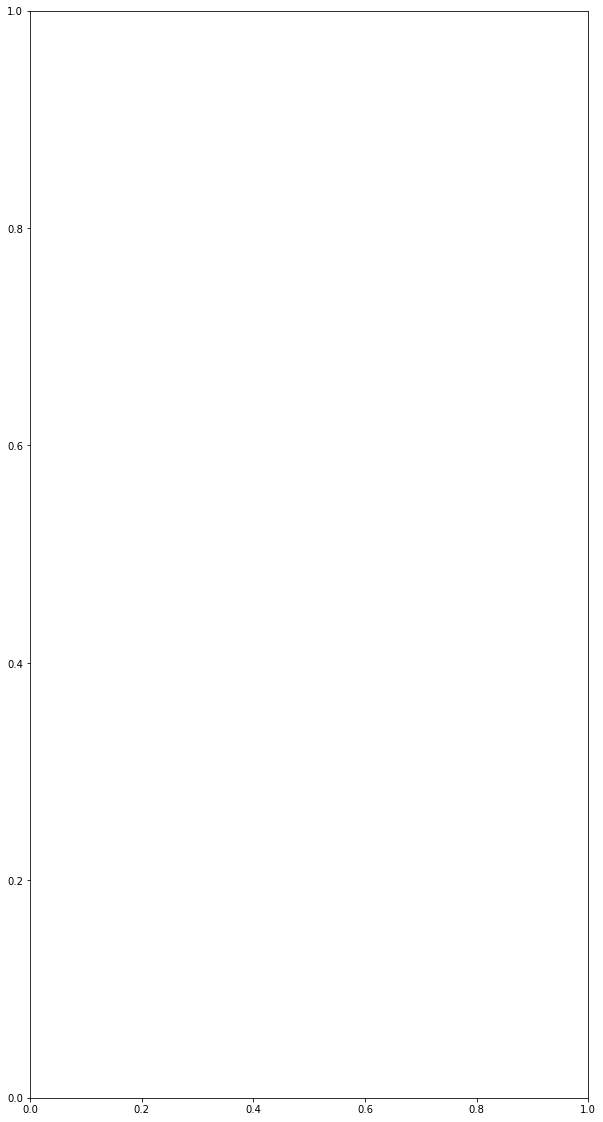

In [20]:
data = []
fig, ax = plt.subplots(figsize = (10, 20))
for stage, group in stage_results.groupby('Proppant_per_cluster'):
    data.append(group.iloc[:, :212].mean())
    
dset = np.vstack(data)
ax.boxplot(dset.T, vert = False, positions = stage_results['Proppant_per_cluster'].unique())
    
ax.set_ylabel("Number of Clusters")
ax.set_xlabel("Mean Clusters per m inflow model")
    
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(stage_results['Clusters_per_m'])

In [ ]:
for stage, group in merged_results.groupby('Stage'):
    print(stage, group['Measured Depth (mKB)'].max() - group['Measured Depth (mKB)'].min())